<a href="https://colab.research.google.com/github/nitrogenlab/GP15_watermassanalysis/blob/main/notebooks/sensitivity/SensitivityAnalysis2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Based on the original sensitivity analysis notebook at
# https://github.com/nitrogenlab/GP15_watermassanalysis/blob/5d0420ae4b8a4689a8cee98e36876e8ed2cb8c68/GP15analysis_sensitivityanalysis.ipynb

#Install pyompa
!pip uninstall -y pyompa
%cd /content/
!rm -rf pyompa
!git clone https://github.com/nitrogenlab/pyompa
%cd /content/pyompa
!git checkout main
!git log -1
!pip install .
%cd /content/

Found existing installation: pyompa 0.4.2.1
Uninstalling pyompa-0.4.2.1:
  Successfully uninstalled pyompa-0.4.2.1
/content
Cloning into 'pyompa'...
remote: Enumerating objects: 1439, done.
remote: Counting objects: 100% (177/177), done.
remote: Compressing objects: 100% (78/78), done.
remote: Total 1439 (delta 166), reused 99 (delta 99), pack-reused 1262 (from 2)
Receiving objects: 100% (1439/1439), 18.39 MiB | 21.32 MiB/s, done.
Resolving deltas: 100% (1009/1009), done.
/content/pyompa
Already on 'main'
Your branch is up to date with 'origin/main'.
commit 665d16d4578d6206e0784bdddfe1fe230c54be13 (HEAD -> main, origin/main, origin/HEAD)
Merge: cb636c3 8cacca6
Author: Av Shrikumar <avanti.shrikumar@gmail.com>
Date:   Thu Jul 17 13:22:18 2025 +1000

    Merge pull request #12 from nitrogenlab/AvantiShri-patch-1
    
    Update README.md
Processing /content/pyompa
  Preparing metadata (setup.py) ... done
  Created wheel for pyompa: filename=pyompa-0.4.2.1-py3-none-any.whl size=27935 sha2

In [2]:
#Install gp15wmascripts
!pip uninstall -y gp15wma
%cd /content/
!rm -rf gp15wmascripts
!git clone https://github.com/nitrogenlab/gp15wmascripts
%cd /content/gp15wmascripts
!git checkout main
!git log -1
!pip install .
%cd /content/

Found existing installation: gp15wma 0.1.0.0
Uninstalling gp15wma-0.1.0.0:
  Successfully uninstalled gp15wma-0.1.0.0
/content
Cloning into 'gp15wmascripts'...
remote: Enumerating objects: 368, done.
remote: Counting objects: 100% (142/142), done.
remote: Compressing objects: 100% (137/137), done.
remote: Total 368 (delta 90), reused 3 (delta 3), pack-reused 226 (from 1)
Receiving objects: 100% (368/368), 16.59 MiB | 19.68 MiB/s, done.
Resolving deltas: 100% (214/214), done.
/content/gp15wmascripts
Already on 'main'
Your branch is up to date with 'origin/main'.
commit 8d4822dba6260752d5e710914d0d407de2b19607 (HEAD -> main, origin/main, origin/HEAD)
Author: rml54 <45828236+rml54@users.noreply.github.com>
Date:   Mon Sep 4 12:05:51 2023 -0400

    Update settingdefaults.py
    
    remove nitrate
Processing /content/gp15wmascripts
  Preparing metadata (setup.py) ... done
  Created wheel for gp15wma: filename=gp15wma-0.1.0.0-py3-none-any.whl size=15446 sha256=b0a5aee0e20d4d090f5eac84e7d00

In [3]:
import pyompa
import gp15wma

In [4]:
gp15_df, gp15_intermediateanddeep, gp15_thermocline = gp15wma.download_and_load_gp15_data(
    station_to_tc_cutoffs_url="https://raw.githubusercontent.com/nitrogenlab/GP15_watermassanalysis/main/station_to_tc_cutoffs.json")

bottle flag BTLNBR_FLAG_W BTLNBR_FLAG_W
uint8
leg1 nans 0
leg2 nans 0
CTD salinity flag CTDSAL_FLAG_W CTDSAL_FLAG_W
uint8
leg1 nans 0
leg2 nans 0
bottle oxygen flag Flag_OXYGEN_D_CONC_BOTTLE_qizf9x Flag_OXYGEN_D_CONC_BOTTLE_n41f8b
uint8
leg1 nans 0
leg2 nans 0
silicate flag Flag_SILICATE_D_CONC_BOTTLE_l9fh07 Flag_SILICATE_D_CONC_BOTTLE_3fot83
uint8
leg1 nans 0
leg2 nans 0
nitrate flag Flag_NITRATE_D_CONC_BOTTLE_xhgtuv Flag_NITRATE_D_CONC_BOTTLE_bugat8
uint8
leg1 nans 0
leg2 nans 0
phosphate flag Flag_PHOSPHATE_D_CONC_BOTTLE_lof4ap Flag_PHOSPHATE_D_CONC_BOTTLE_d0rgav
uint8
leg1 nans 0
leg2 nans 0
CTD pressure CTDPRS CTDPRS
float64
leg1 nans 487
leg2 nans 492
CTD temperature CTDTMP CTDTMP
float64
leg1 nans 487
leg2 nans 492
practical_salinity CTDSAL CTDSAL
float64
leg1 nans 487
leg2 nans 492
lat LATITUDE LATITUDE
float64
leg1 nans 476
leg2 nans 484
lon LONGITUDE LONGITUDE
float64
leg1 nans 476
leg2 nans 484
stnnbr STNNBR STNNBR
<U12
leg1 and leg2 arrays are strings.
geotrc_ID GEOTRC_SAMP

In [5]:
interanddeep_endmember_df = gp15wma.load_interanddeep_endmember_df(
    df_url="https://raw.githubusercontent.com/nitrogenlab/GP15_watermassanalysis/main/GP15_intermediateanddeep_endmemberswithsubtypes.csv",
    df_file_name="GP15_intermediateanddeep.csv")


In [6]:
from gp15wma.sensitivity import BaseSensitivityAnalysis, OmpaArguments
import numpy as np
import json

#Prepare the varying OMPA arguments

rng = np.random.RandomState(1234) #instantiate random number generator with fixed seed
num_samples = 20
base_weighting = gp15wma.settingdefaults.PARAM_WEIGHTINGS

#sample varying parameter weightings
sampled_weightings = []
for i in range(num_samples):
    rand_weighting = dict([
        (key, rng.uniform(value*0.8, value*1.2))
        for key,value in base_weighting.items()
    ])
    sampled_weightings.append(rand_weighting)

#write out the various sampled weightings
open("sampled_weightings.json", "w").write(
    json.dumps(sampled_weightings, indent=4))

varying_arguments_list = [OmpaArguments(
        constructor_arguments={"param_weightings": weighting},
        solve_arguments={}) for weighting in sampled_weightings]

intermediate_and_deep_weighting_sens_analysis = BaseSensitivityAnalysis(
    static_ompa_arguments = OmpaArguments(
        constructor_arguments={
          "obs_df": gp15_intermediateanddeep,
          "endmembername_to_usagepenaltyfunc": gp15wma.settingdefaults.USAGE_PENALTY,
          "param_names": gp15wma.settingdefaults.PARAM_NAMES,
          "convertedparam_groups": gp15wma.settingdefaults.CONVERTEDPARAM_GROUPS
          },
        solve_arguments={
            "endmember_df": interanddeep_endmember_df,
            "endmember_name_column": "watermass_name",
            "batch_size": 100
        }
    ))

!mkdir param_weightings_sensitivity
ompa_solns = intermediate_and_deep_weighting_sens_analysis.run(
    varying_arguments_list = varying_arguments_list,
    outdir="param_weightings_sensitivity",
    export_settings={"orig_cols_to_include":[
         "lat", "lon", "Depth", "stnnbr", "geotrc_ID"]})

mkdir: cannot create directory ‘param_weightings_sensitivity’: File exists
On varying argument 0 out of 20
varying arguments: OMPAArguments(constructor_arguments={'param_weightings': {'conservative_temp': 49.09003568848719, 'absolute_salinity': 83.90748067327462, 'silicate': 2.9252732868085376, 'nitrate': 5.570717167427539, 'phosphate': 5.559951616237607, 'oxygen': 0.9090370421130567, 'NO': 0.9105857020572387, 'PO': 0.5603744355070038}}, solve_arguments={})
Adding penalty for ENPCW_*
Adding penalty for SPCW_*
Adding penalty for PSUW_*
Adding penalty for ESSW_*
Adding penalty for EqIW_*
Adding penalty for LCDW_*
Adding penalty for AAIW_*
Adding penalty for NPIW_*
Adding penalty for UCDW_*
Adding penalty for AABW_*
Endmember-idx mapping is
 OrderedDict([('AABW', [0]), ('AAIW', [1, 2]), ('ENPCW', [3, 4]), ('EqIW', [5, 6]), ('LCDW', [7, 8]), ('NPIW', [9, 10, 11]), ('PDW', [12, 13, 14]), ('ESSW', [15, 16]), ('PSUW', [17, 18]), ('SPCW', [19, 20]), ('UCDW', [21])])
Found match between ENPCW_0

/usr/local/lib/python3.11/dist-packages/cvxpy/problems/problem.py:1510: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


status: optimal
optimal value 113.4089745310311
Original weighted sum squares: 75.58649459721849
Post fix weighted sum squared: 75.58816226049176
Trying convertedvariable sign constraint: [-1 -1]
On example 0 to 100 out of 682
status: optimal
optimal value 26132.791805813562
Original weighted sum squares: 23542.938826976133
Post fix weighted sum squared: 23542.938906286003
On example 100 to 200 out of 682
status: optimal
optimal value 4095.8262509428746
Original weighted sum squares: 3736.198418316145
Post fix weighted sum squared: 3736.1984234321117
On example 200 to 300 out of 682
status: optimal
optimal value 2038.776236229919
Original weighted sum squares: 1649.8855031856933
Post fix weighted sum squared: 1649.885505062276
On example 300 to 400 out of 682
status: optimal
optimal value 2977.444969351408
Original weighted sum squares: 2940.851161119619
Post fix weighted sum squared: 2940.8511641052564
On example 400 to 500 out of 682
status: optimal
optimal value 646.3317824571607
Or

/usr/local/lib/python3.11/dist-packages/cvxpy/problems/problem.py:1510: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


status: optimal
optimal value 102.53091077087097
Original weighted sum squares: 70.319528908658
Post fix weighted sum squared: 70.31992394964223
objective: 5838.684769088595
writing to param_weightings_sensitivity/run_18.csv
On varying argument 19 out of 20
varying arguments: OMPAArguments(constructor_arguments={'param_weightings': {'conservative_temp': 50.526633616124734, 'absolute_salinity': 67.46596781384733, 'silicate': 3.3314168678086586, 'nitrate': 5.564955985200404, 'phosphate': 5.523207828614988, 'oxygen': 1.1657612453077295, 'NO': 1.063449112776969, 'PO': 0.5136735163145865}}, solve_arguments={})
Adding penalty for ENPCW_*
Adding penalty for SPCW_*
Adding penalty for PSUW_*
Adding penalty for ESSW_*
Adding penalty for EqIW_*
Adding penalty for LCDW_*
Adding penalty for AAIW_*
Adding penalty for NPIW_*
Adding penalty for UCDW_*
Adding penalty for AABW_*
Endmember-idx mapping is
 OrderedDict([('AABW', [0]), ('AAIW', [1, 2]), ('ENPCW', [3, 4]), ('EqIW', [5, 6]), ('LCDW', [7, 8]),

In [7]:
from gp15wma.sensitivity import get_mean_and_stdev_skeletons

mean_skeleton, std_skeleton = get_mean_and_stdev_skeletons(ompa_solns=ompa_solns)

mean


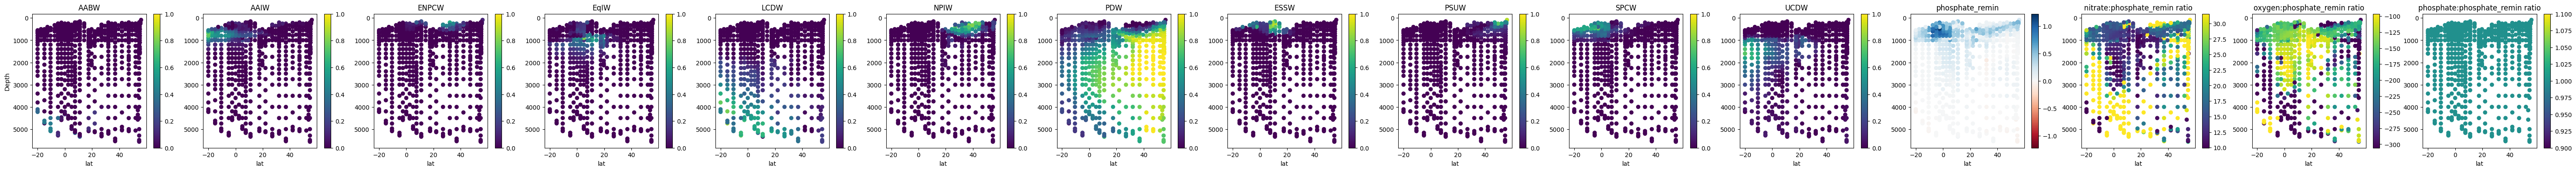

std


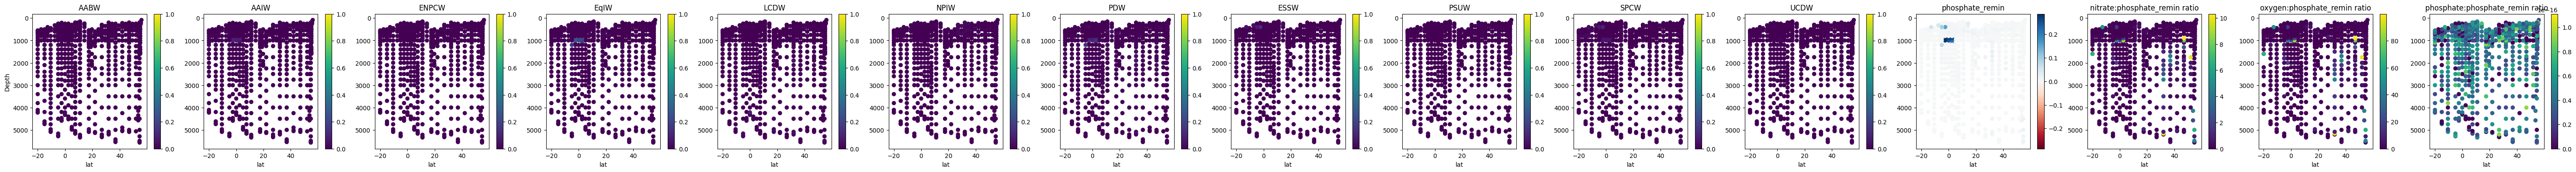

In [8]:
#plot the solutions
print("mean")
pyompa.plot_ompasoln_endmember_fractions(ompa_soln=mean_skeleton,
                                  xaxis_colname="lat",
                                  yaxis_colname="Depth",
                                  group_endmembers=True)
print("std")
pyompa.plot_ompasoln_endmember_fractions(ompa_soln=std_skeleton,
                                  xaxis_colname="lat",
                                  yaxis_colname="Depth",
                                  group_endmembers=True)


mean


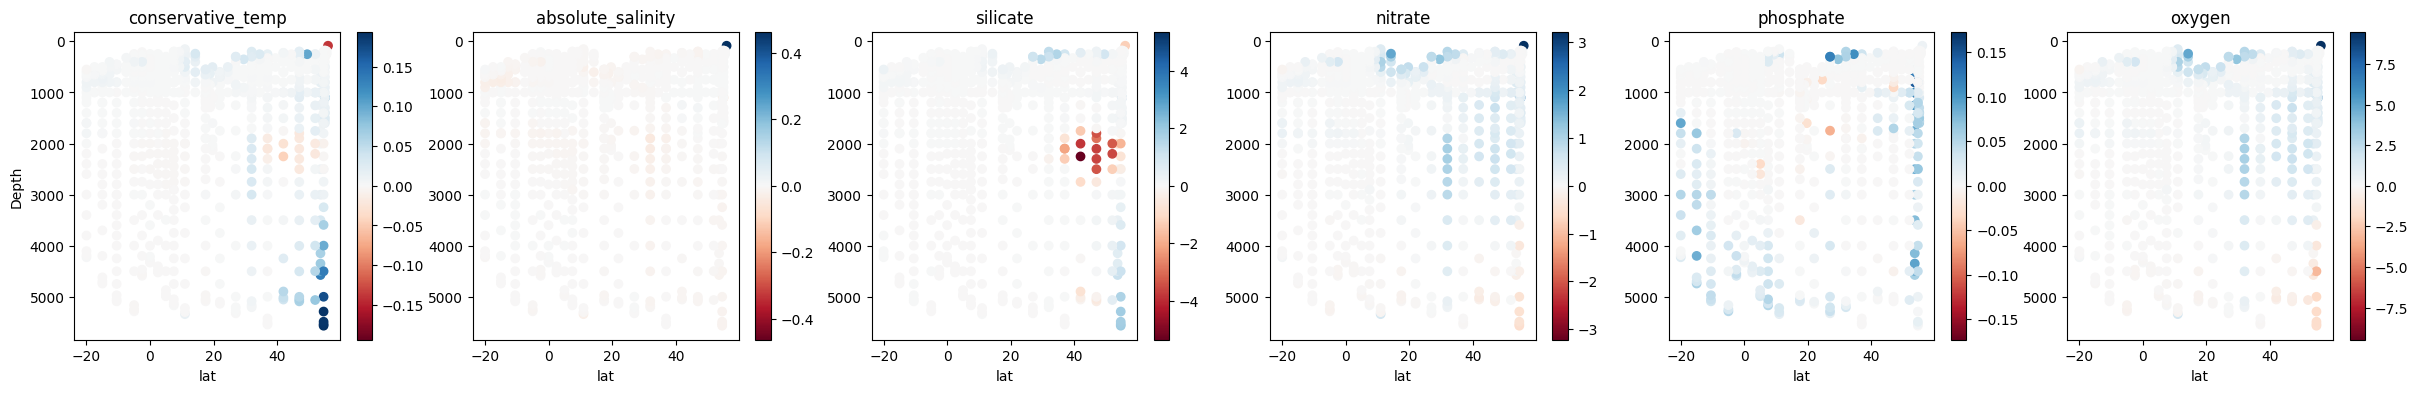

std


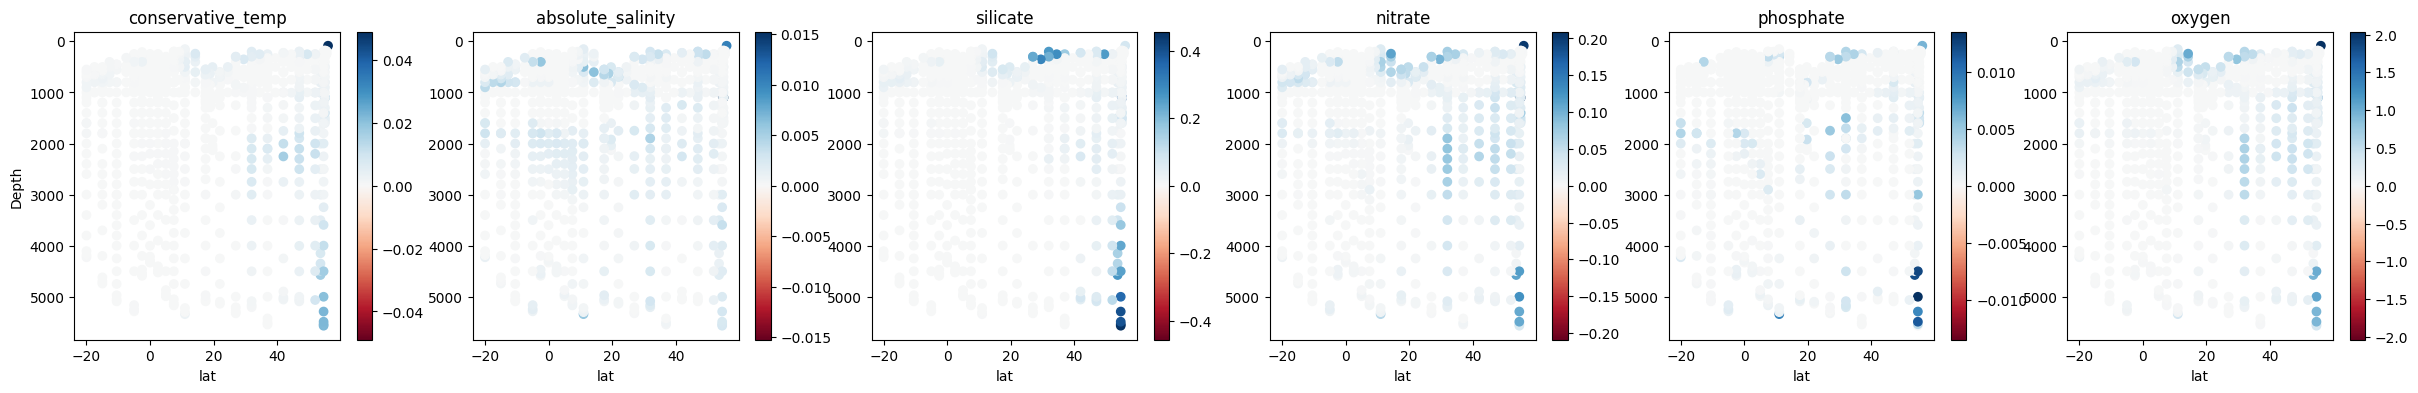

In [9]:
xaxis_colname="lat"
yaxis_colname="Depth"
flip_y=True

print("mean")
pyompa.plotting.plot_residuals(
        param_residuals=mean_skeleton.param_residuals,
        param_names=mean_skeleton.param_names,
        xaxis_vals=mean_skeleton.obs_df[xaxis_colname],
        xaxis_label=xaxis_colname,
        yaxis_vals=mean_skeleton.obs_df[yaxis_colname],
        yaxis_label=yaxis_colname, flip_y=flip_y,
        perobs_weighted_resid_sq=None)

print("std")
pyompa.plotting.plot_residuals(
        param_residuals=std_skeleton.param_residuals,
        param_names=mean_skeleton.param_names,
        xaxis_vals=mean_skeleton.obs_df[xaxis_colname],
        xaxis_label=xaxis_colname,
        yaxis_vals=mean_skeleton.obs_df[yaxis_colname],
        yaxis_label=yaxis_colname, flip_y=flip_y,
        perobs_weighted_resid_sq=None)

In [10]:
###uncomment below to export csv with senstivity analysis info###

ORIG_COLS_TO_INCLUDE = ["lat", "lon", "Depth", "CTD pressure", "stnnbr", "geotrc_ID", "sigma0"]
mean_skeleton.export_to_csv(
    csv_output_name="mean_skeleton.csv",
    orig_cols_to_include=ORIG_COLS_TO_INCLUDE)
std_skeleton.export_to_csv(
    csv_output_name="std_skeleton.csv",
    orig_cols_to_include=ORIG_COLS_TO_INCLUDE)

writing to mean_skeleton.csv
writing to std_skeleton.csv
